In [1]:
import arviz as az
from tms_risk.cogmodels.fit_probit import build_model, get_data
from tms_risk.cogmodels.utils import extract_intercept_gamma, format_bambi_ppc, plot_ppc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import os.path as op
sns.set_theme('paper', 'white', font='helvetica', font_scale=2, palette='tab10')

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
bids_folder = '/data/ds-tmsrisk'

stimulation_palette = sns.color_palette()[2:4]
stimulation_order = ['vertex', 'ips']

# Simple model

In [3]:
# model_label = 'probit_simple_model_session'
model_label = 'probit_simple'

In [4]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


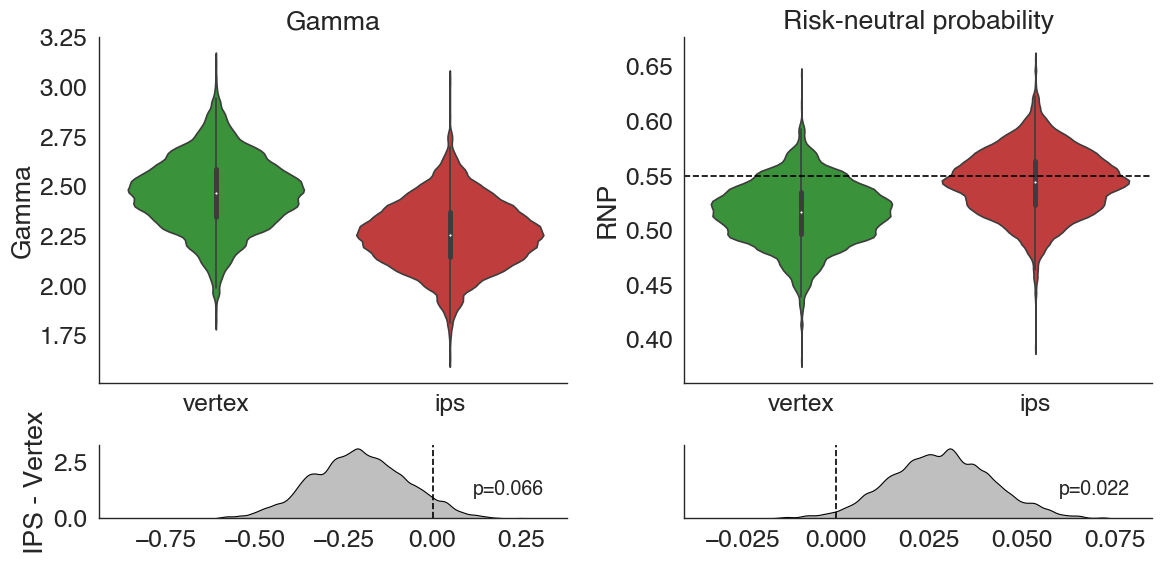

In [5]:
fig = plt.figure(figsize=(12, 6))

ax0 = plt.subplot2grid((4, 2), (0, 0), rowspan=3)
sns.violinplot(data=gamma.reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
sns.despine()
ax0.set_xlabel(None)
ax0.set_ylabel('Gamma')


ax0.set_title('Gamma')

ax1 = plt.subplot2grid((4, 2), (3, 0))
gamma_delta = gamma.unstack('stimulation_condition')
gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']
sns.kdeplot(gamma_delta, fill=True, color='k', ax=ax1)
ax1.set_title(None)
sns.despine()

ax1.set_xlabel(None)
ax1.set_ylabel('IPS - Vertex')

p = (gamma_delta > 0.0).mean()

ax1.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax1.transAxes)

ax1.axvline(0.0, c='k', ls='--')


ax2 = plt.subplot2grid((4, 2), (0, 1), rowspan=3)
sns.violinplot(data=rnp.reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax2)
sns.despine()
ax2.set_xlabel(None)
ax2.set_ylabel('RNP')
ax2.axhline(0.55, c='k', ls='--')

plt.tight_layout()

ax2.set_title('Risk-neutral probability')

ax3 = plt.subplot2grid((4, 2), (3, 1))

rnp_delta = rnp.unstack('stimulation_condition')
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']
sns.kdeplot(rnp_delta, color='k', fill=True, ax=ax3)

plt.axvline(0.0, c='k', ls='--')

sns.despine()


plt.ylabel(None)
plt.yticks([])
p = (rnp_delta < 0.0).mean()

ax3.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax3.transAxes)

plt.tight_layout()

plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_summary.pdf', bbox_inches='tight')
plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_summary.png', bbox_inches='tight')

In [6]:
ppc = format_bambi_ppc(idata, model, data)

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:131: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:86: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


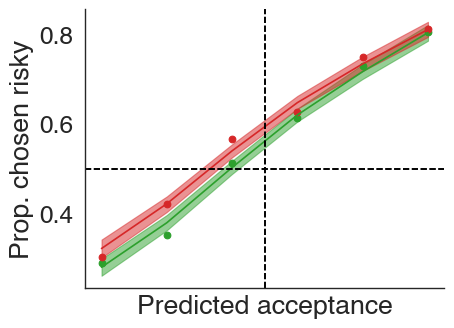

In [7]:
g = plot_ppc(data, ppc, 0, level='group', legend=False, aspect=1.25, height=4, var_name='p')

# g.set(aspect=1.)
# g.fig.set_
# g.fig.set_size_inches(12, 12)
# g.fig.set_size_inches(5, 12)
g.set(xticks=[])

g.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_ppc.pdf')
g.savefig('/data/ds-tmsrisk/derivatives/figures/probit_simple_ppc.png')

# Probit with order

In [3]:
model_label = 'probit_order'

In [4]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)

idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [5]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

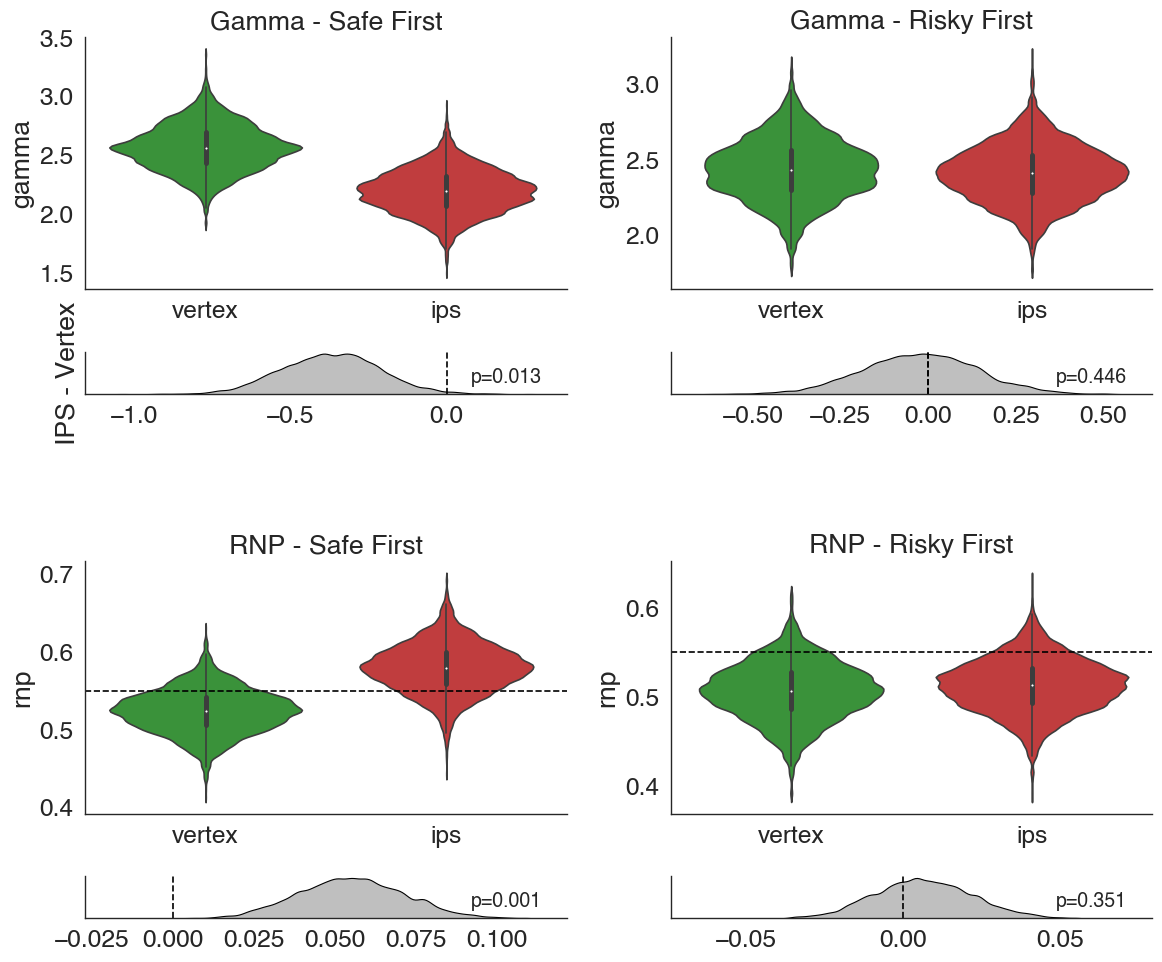

In [6]:
fig = plt.figure(figsize=(12, 10))

ax0 = plt.subplot2grid((9, 2), (0, 0), rowspan=3)
sns.violinplot(data=gamma.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax0)
sns.despine()
ax0.set_xlabel(None)
ax0.set_title('Gamma - Safe First')

ax1 = plt.subplot2grid((9, 2), (0, 1), rowspan=3)
sns.violinplot(data=gamma.xs(True, 0, 'risky_first').reset_index(), x='stimulation_condition', y='gamma', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax1)
sns.despine()
ax1.set_xlabel(None)
ax1.set_title('Gamma - Risky First')

gamma_delta = gamma.unstack('stimulation_condition')

gamma_delta = gamma_delta['ips'] - gamma_delta['vertex']

ax2 = plt.subplot2grid((9, 2), (3, 0))
sns.kdeplot(gamma_delta.xs(False, 0, 'risky_first'), fill=True, color='k', ax=ax2)
sns.despine()

ax2.set_xlabel(None)
ax2.set_ylabel('IPS - Vertex')
ax2.axvline(0.0, c='k', ls='--')
ax2.set_yticks([])

p = (gamma_delta.xs(False, 0, "risky_first") > 0.0).mean()

ax2.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax2.transAxes)


ax3 = plt.subplot2grid((9, 2), (3, 1))
ax3.axvline(0.0, c='k', ls='--')
sns.kdeplot(gamma_delta.xs(True, 0, 'risky_first'), fill=True, color='k', ax=ax3)
sns.despine()

ax3.set_xlabel(None)
ax3.set_ylabel(None)
ax3.set_yticks([])

p = (gamma_delta.xs(True, 0, "risky_first") > 0.0).mean()

ax3.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax3.transAxes)

ax3.axvline(0.0, c='k', ls='--')

ax4 = plt.subplot2grid((9, 2), (5, 0), rowspan=3)
sns.violinplot(data=rnp.xs(False, 0, 'risky_first').reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax4)
sns.despine()
ax4.set_xlabel(None)
ax4.set_title('RNP - Safe First')
ax4.axhline(0.55, c='k', ls='--')

ax5 = plt.subplot2grid((9, 2), (5, 1), rowspan=3)
sns.violinplot(data=rnp.xs(True, 0, 'risky_first').reset_index(), x='stimulation_condition', y='rnp', palette=stimulation_palette, order=stimulation_order, bw='silverman', ax=ax5)
sns.despine()
ax5.set_xlabel(None)
ax5.set_title('RNP - Risky First')

ax5.axhline(0.55, c='k', ls='--')


rnp_delta = rnp.unstack('stimulation_condition')
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']

ax6 = plt.subplot2grid((9, 2), (8, 0))
sns.kdeplot(rnp_delta.xs(False, 0, 'risky_first'), color='k', fill=True, ax=ax6)

p = (rnp_delta.xs(False, 0, "risky_first") < 0.0).mean()
ax6.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax6.transAxes)

plt.axvline(0.0, c='k', ls='--')

ax6.set_ylabel(None)
ax6.set_yticks([])
sns.despine()



ax7 = plt.subplot2grid((9, 2), (8, 1))
sns.kdeplot(rnp_delta.xs(True, 0, 'risky_first'), color='k', fill=True, ax=ax7)

p = (rnp_delta.xs(True, 0, "risky_first") < 0.0).mean()
ax7.text(0.8, 0.4, f'p={p:0.3f}',
     horizontalalignment='left',
     fontsize=14,
     verticalalignment='center',
     transform = ax7.transAxes)

ax7.set_ylabel(None)
ax7.set_yticks([])

plt.axvline(0.0, c='k', ls='--')

sns.despine()
plt.tight_layout()

plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_order_summary.pdf', bbox_inches='tight')
plt.savefig('/data/ds-tmsrisk/derivatives/figures/probit_order_summary.png', bbox_inches='tight')

In [7]:
rnp

subject  n_safe  risky_first  session3  stimulation_condition  session  chain  draw
1        28.0    False        False     vertex                 2        0      0       0.508199
                                                                               1       0.523806
                                                                               2       0.523848
                                                                               3       0.516113
                                                                               4       0.543552
                                                                                         ...   
         14.0    True         True      ips                    3        3      995     0.511020
                                                                               996     0.502390
                                                                               997     0.560561
                                                    

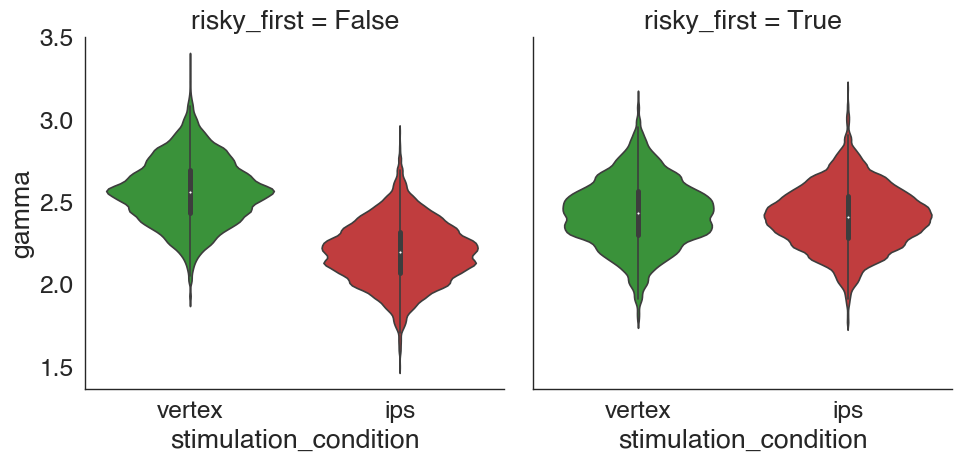

In [8]:
sns.catplot(data=gamma.reset_index(), x='stimulation_condition', y='gamma', col='risky_first', kind='violin', order=stimulation_order, palette=stimulation_palette)

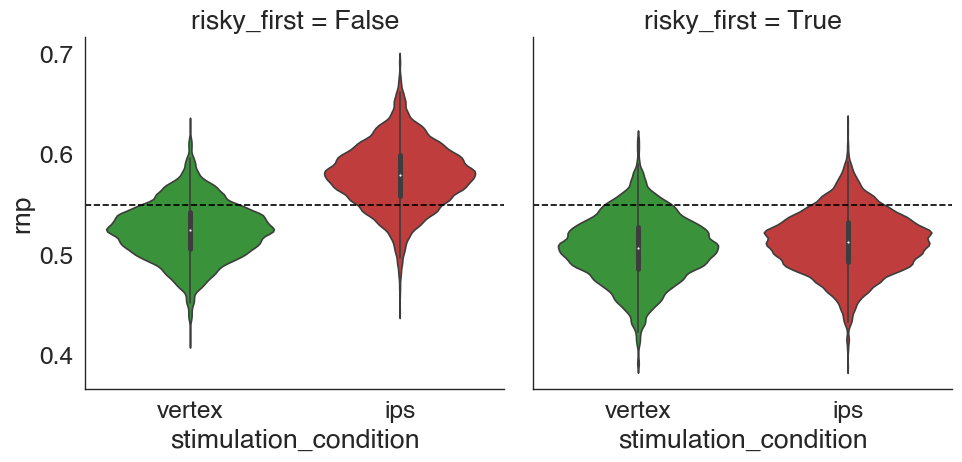

In [9]:
g = sns.catplot(data=rnp.reset_index(), x='stimulation_condition', y='rnp', col='risky_first', kind='violin', order=stimulation_order, palette=stimulation_palette)

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_12601/3594617024.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rnp_delta[True])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_12601/3594617024.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rnp_delta[False])


(0.35075, 0.00125)

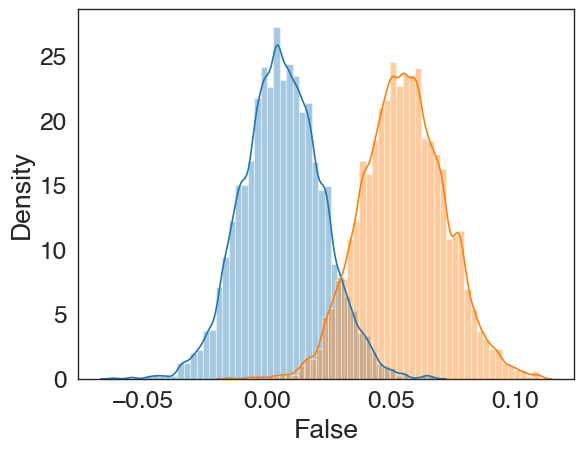

In [10]:
rnp_delta = rnp.unstack(['stimulation_condition', 'risky_first'])
rnp_delta = rnp_delta['ips'] - rnp_delta['vertex']
sns.distplot(rnp_delta[True])
sns.distplot(rnp_delta[False])
(rnp_delta[True] < 0.0).mean(), (rnp_delta[False] < 0.0).mean()

In [11]:
ppc = format_bambi_ppc(idata, model, data)

/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:131: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  ppc = ppc.groupby(['subject']+groupby).mean()
/Users/gdehol/git/tms_risk/tms_risk/cogmodels/utils.py:86: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi = pd.DataFrame(az.hdi(ppc.T.values), index=ppc.index,


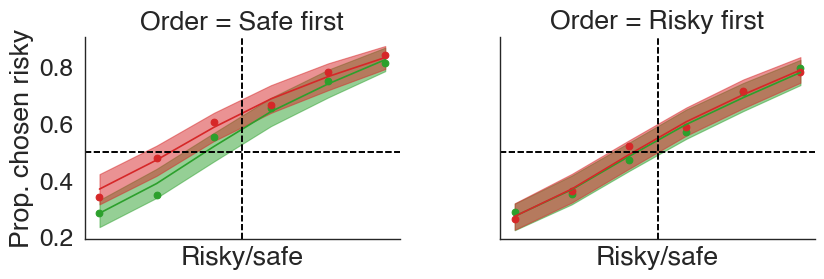

In [12]:
g = plot_ppc(data, ppc, 7, level='group', var_name='ll_bernoulli', legend=False)

g.fig.set_size_inches(10, 4)

g.set(xticks=[], xlabel='Risky/safe')
# g.set_xlabel('Risky/safe (a.u.)')

g.savefig(op.join(bids_folder, 'derivatives', 'figures', 'probit_order_ppc.pdf'))

In [13]:
intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

In [21]:
rnp_ = rnp.groupby(['stimulation_condition', 'subject', 'risky_first', 'chain', 'draw']).mean()

In [27]:
mean_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).mean().to_frame('mean')
ci_pars = rnp_.groupby(['stimulation_condition', 'subject', 'risky_first']).apply(lambda x: pd.Series(az.hdi(x.values.ravel(), .95), index=pd.Index(['ci_min', 'ci_max']))).to_frame('value').unstack(-1)['value']

par_stats = mean_pars.join(ci_pars)

In [29]:
def plot_scatter_with_errors(data, xlabel='Vertex', ylabel='IPS', **kwargs):

    x = data[('mean', xlabel)]
    y = data[('mean', ylabel)] 

    xerr_min = x - data['ci_min', xlabel]
    xerr_max = data['ci_max', xlabel] - x

    yerr_min = y - data['ci_min', ylabel]
    yerr_max = data['ci_max', ylabel] - y


    plt.errorbar(x, y, [yerr_min, yerr_max], [xerr_min, xerr_max], fmt='.', markersize=0, alpha=0.5, **kwargs)
    plt.scatter(data[('mean', xlabel)], data[('mean', ylabel)], marker='.', s=50, **kwargs)

In [33]:
par_stats.unstack('stimulation_condition')

mean              ci_min              ci_max  \
stimulation_condition       ips    vertex       ips    vertex       ips   
subject risky_first                                                       
1       False          0.525677  0.467877  0.472046  0.421707  0.579890   
        True           0.473703  0.440878  0.427112  0.394952  0.517985   
2       False          0.629352  0.537089  0.521485  0.459174  0.754697   
        True           0.497747  0.512484  0.416289  0.422437  0.578519   
3       False          0.575689  0.533387  0.527204  0.491185  0.625617   
...                         ...       ...       ...       ...       ...   
69      True           0.691586  0.721884  0.602605  0.626115  0.800821   
72      False          0.607707  0.528932  0.554037  0.473557  0.656461   
        True           0.539167  0.474870  0.489723  0.417049  0.587973   
74      False          0.295268  0.277246  0.220140  0.211479  0.367580   
        True           0.343453  0.320162  0.273689  0.248480  0.407347   

                                 
stimulation_condition    vertex  
subject risky_first              
1       False          0.510474  
        True           0.488536  
2       False          0.620588  
        True           0.604069  
3       False          0.572481  
...                         ...  
69      True           0.832946  
72      False          0.578444  
        True           0.531734  
74      False          0.339226  
        True           0.387667  

[70 rows x 6 columns]

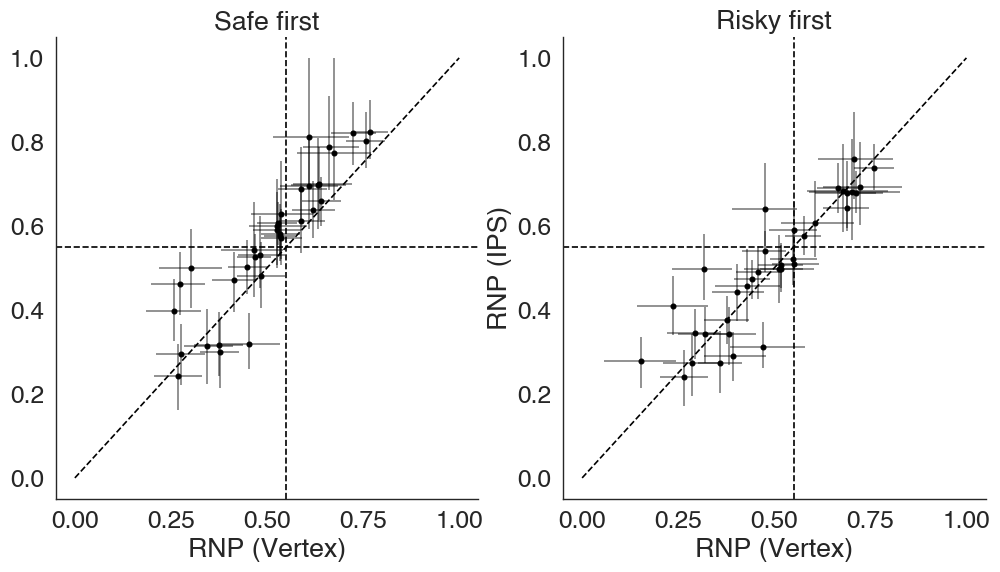

In [45]:
plt.gcf().set_size_inches(12, 6)
plt.subplot(122)
plt.title('Risky first')
plot_scatter_with_errors(par_stats.xs(True, 0, 'risky_first').unstack('stimulation_condition'), xlabel='vertex', ylabel='ips', color='k')
plt.plot([0,1], [0, 1], c='k', ls='--')
plt.axhline(0.55, c='k', ls='--')
plt.axvline(0.55, c='k', ls='--')
plt.xlabel('RNP (Vertex)')
plt.ylabel('RNP (IPS)')

plt.subplot(121)
plt.title('Safe first')
plot_scatter_with_errors(par_stats.xs(False, 0, 'risky_first').unstack('stimulation_condition'), xlabel='vertex', ylabel='ips', color='k')
plt.plot([0,1], [0, 1], c='k', ls='--')
plt.axhline(0.55, c='k', ls='--')
plt.axvline(0.55, c='k', ls='--')
plt.xlabel('RNP (Vertex)')
# plt.ylabel('RNP (IPS)')

sns.despine()

plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'probit_order_rnp_subjectwise.pdf'))

# Subjectwise

In [55]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

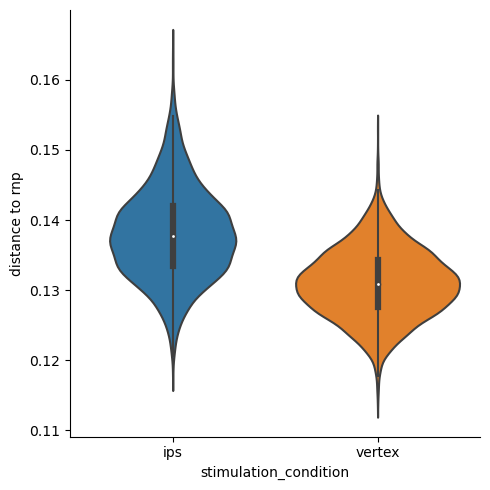

In [63]:
distance_to_rnp = rnp.groupby(['chain', 'draw', 'stimulation_condition']).apply(lambda d: (d - 0.55).abs().mean()).rename('distance to rnp')

sns.catplot(data=distance_to_rnp.reset_index(), x='stimulation_condition', y='distance to rnp', kind='violin')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_21324/4282490735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)


0.82875

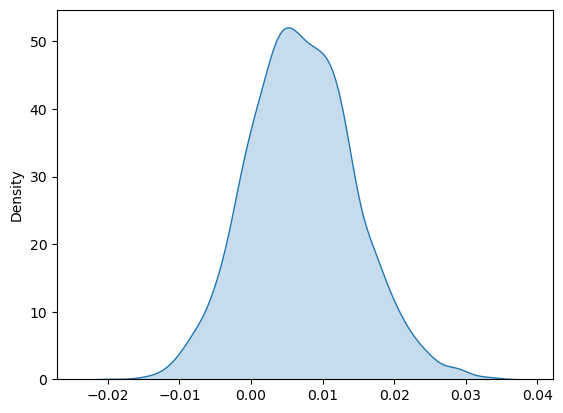

In [70]:
tmp = distance_to_rnp.unstack('stimulation_condition')
sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)

((tmp['ips'] - tmp['vertex']) > 0).mean()

# Probit simple half

In [3]:
model_label = 'probit_simple_half'

data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


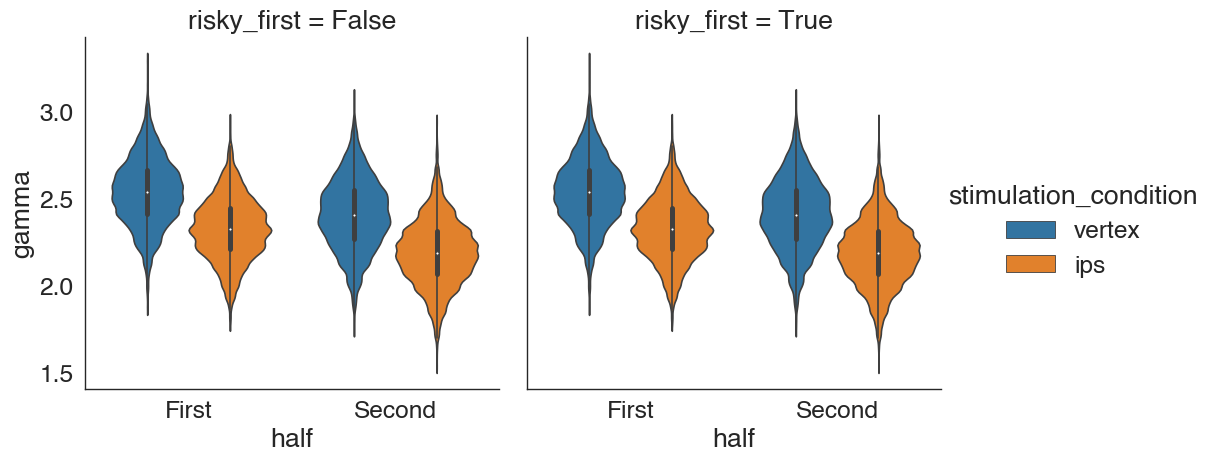

In [7]:
sns.catplot(gamma.reset_index(), x='half', y='gamma', hue='stimulation_condition', col='risky_first', kind='violin')

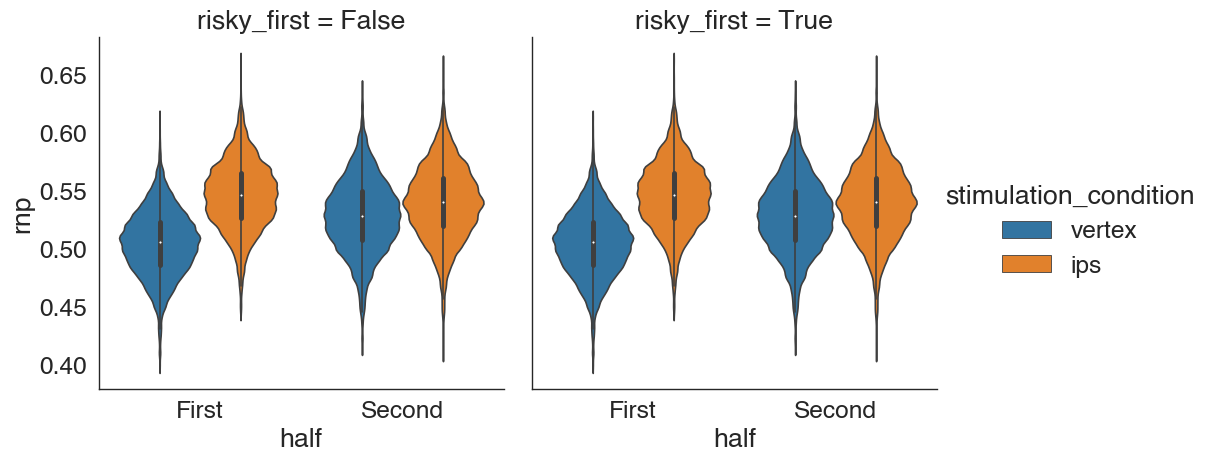

In [8]:
sns.catplot(rnp.reset_index(), x='half', y='rnp', hue='stimulation_condition', col='risky_first', kind='violin')

<Axes: ylabel='Density'>

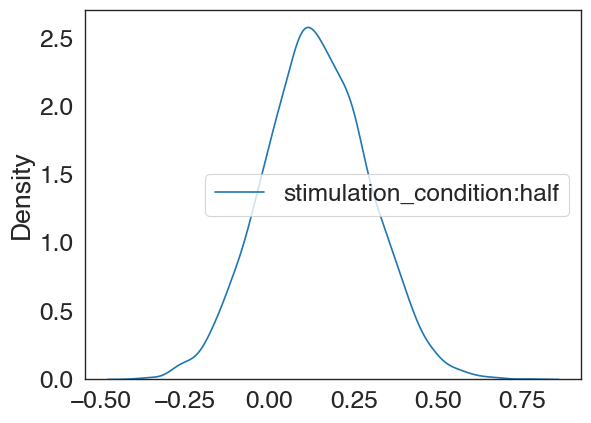

In [13]:
sns.kdeplot(idata.posterior['stimulation_condition:half'].to_dataframe())

<Axes: ylabel='Density'>

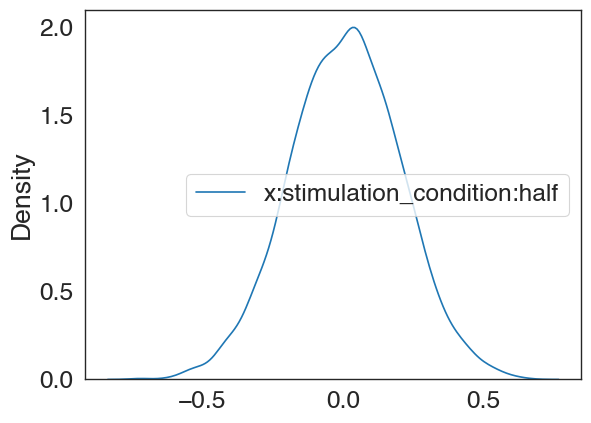

In [14]:
sns.kdeplot(idata.posterior['x:stimulation_condition:half'].to_dataframe())

# Probit order half

In [46]:
model_label = 'probit_order_half'




/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:81: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


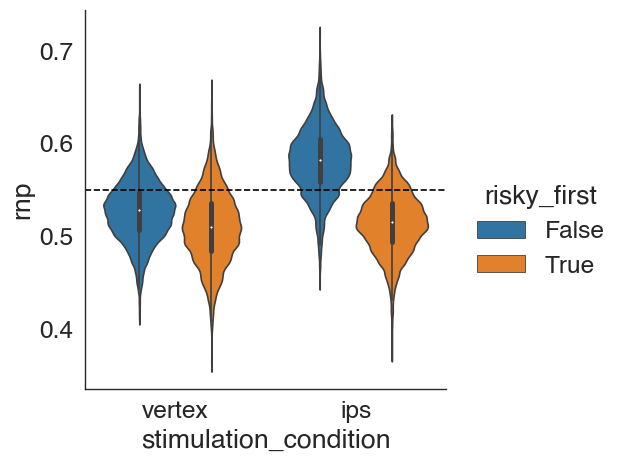

In [74]:
g = sns.catplot(x='stimulation_condition', y='rnp', hue='risky_first', data=rnp.reset_index(), kind='violin')

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

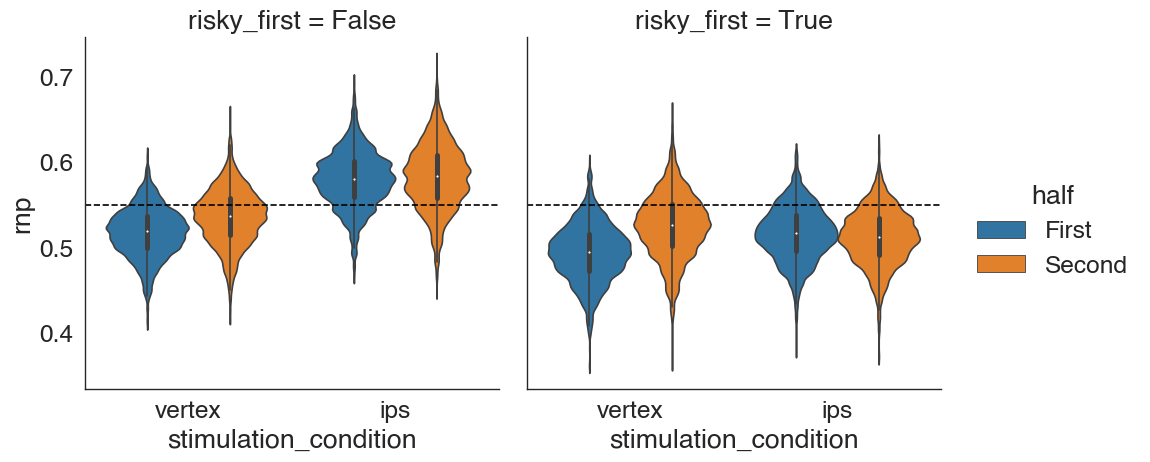

In [63]:
g = sns.catplot(x='stimulation_condition', y='rnp', hue='half', col='risky_first', data=rnp.reset_index(), kind='violin')

g.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

0.7285

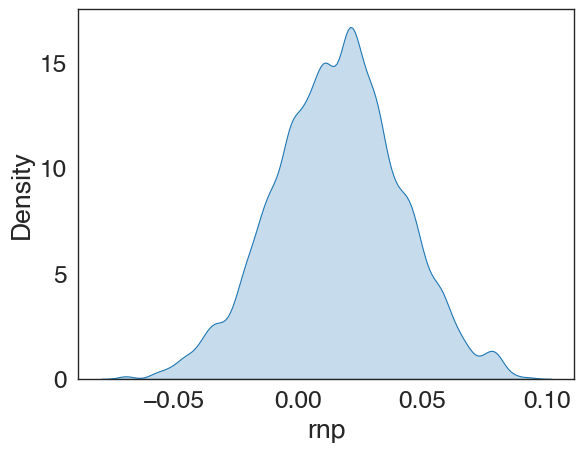

In [71]:
diff1 = rnp.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - rnp.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = rnp.xs(False, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - rnp.xs(False, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)

((diff1 - diff2) > 0).mean()

0.9435

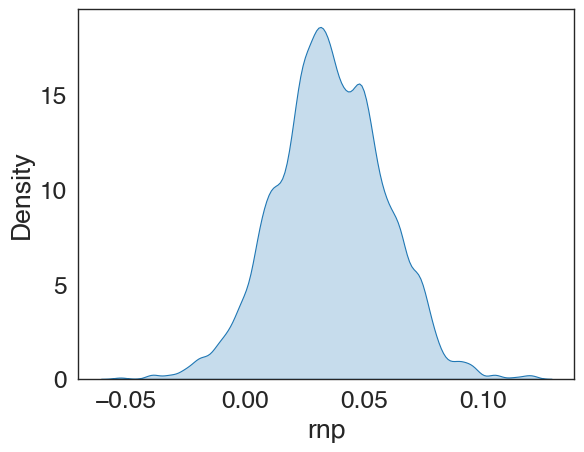

In [72]:
diff1 = rnp.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('First', 0, 'half') - rnp.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('First', 0, 'half')
diff2 = rnp.xs(True, 0, 'risky_first').xs('ips', 0, 'stimulation_condition').xs('Second', 0, 'half') - rnp.xs(True, 0, 'risky_first').xs('vertex', 0, 'stimulation_condition').xs('Second', 0, 'half')
# sns.kdeplot(diff1, fill=True)
# sns.kdeplot(diff2, fill=True)

sns.kdeplot(diff1 -diff2, fill=True)
((diff1 - diff2) > 0).mean()

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

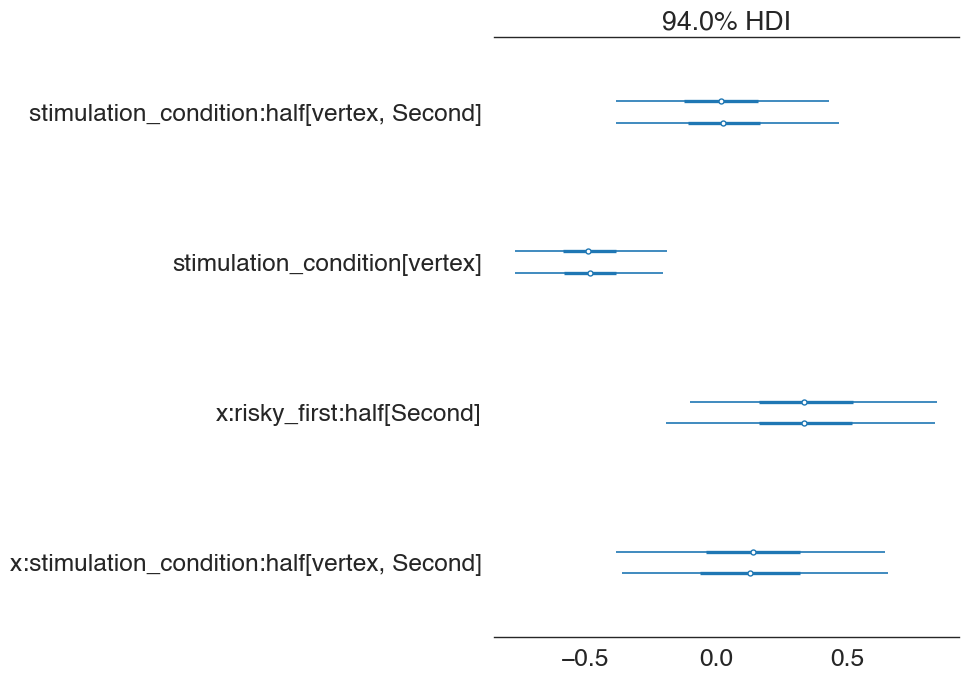

In [60]:
az.plot_forest(idata, var_names=['stimulation_condition:half', 'stimulation_condition', 'x:risky_first:half', 'x:stimulation_condition:half'])

# Full model

In [3]:
model_label = 'probit_full_model_session'

In [4]:
data = get_data(model_label, bids_folder)
model = build_model(model_label, data)
idata = az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf'))


intercept, gamma = extract_intercept_gamma(idata, model, data, group=True)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:66: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [5]:
rnp = rnp.to_frame()
gamma = gamma.to_frame()


rnp.set_index(pd.Series(rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)
gamma.set_index(pd.Series(gamma.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'}), name='Order'), append=True, inplace=True)

In [ ]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', errorbar=get_ci, palette=['gray'], errwidth=3)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

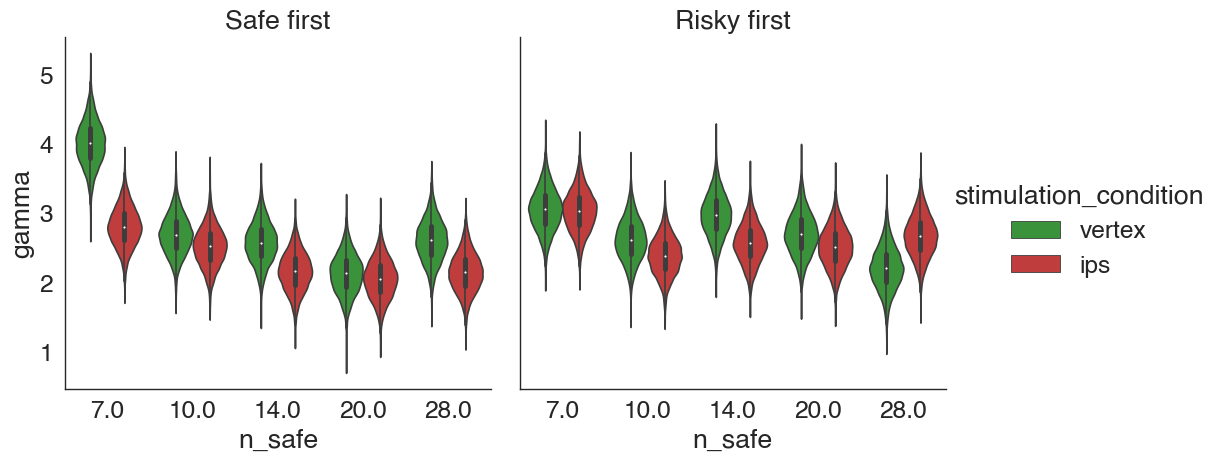

In [6]:
g = sns.catplot(data=gamma.reset_index(), x='n_safe', hue='stimulation_condition', y='gamma', col='Order', kind='violin', hue_order=stimulation_order, palette=stimulation_palette)
g.set_titles('{col_name}')

In [20]:
def get_ci(d):
    return az.hdi(d.values.ravel())

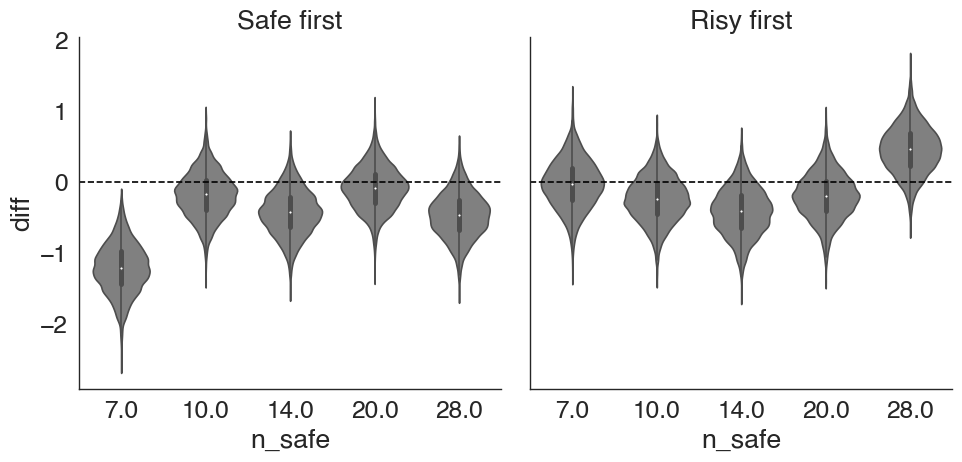

In [ ]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

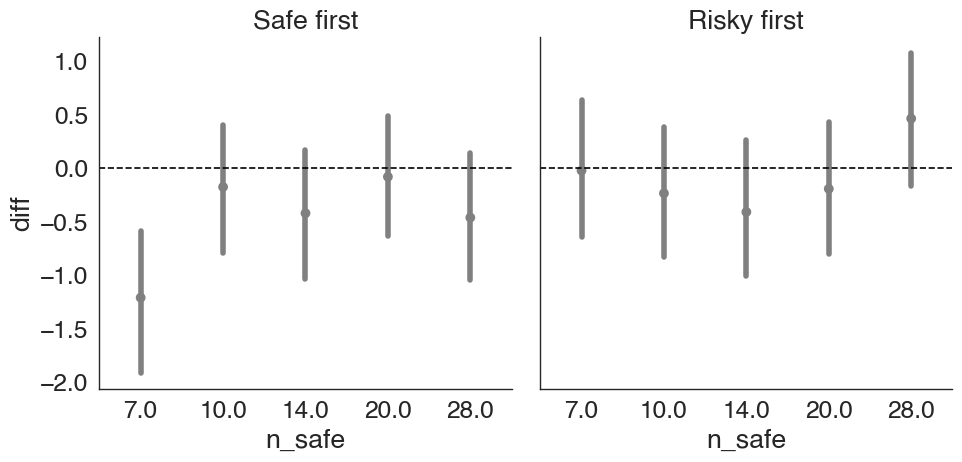

In [24]:
tmp = gamma.unstack(['stimulation_condition'])['gamma']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', palette=['gray'], errorbar=get_ci, errwidth=4)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

g.set_titles('{col_name}')

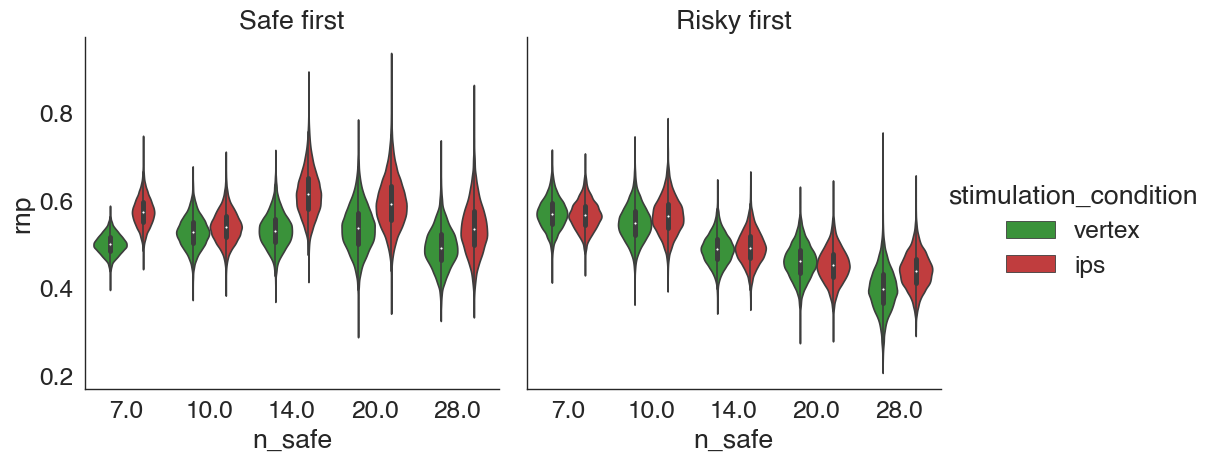

In [9]:
g = sns.catplot(data=rnp.reset_index(), x='n_safe', hue='stimulation_condition', y='rnp', col='Order', kind='violin', hue_order=stimulation_order, palette=stimulation_palette)
g.set_titles('{col_name}')

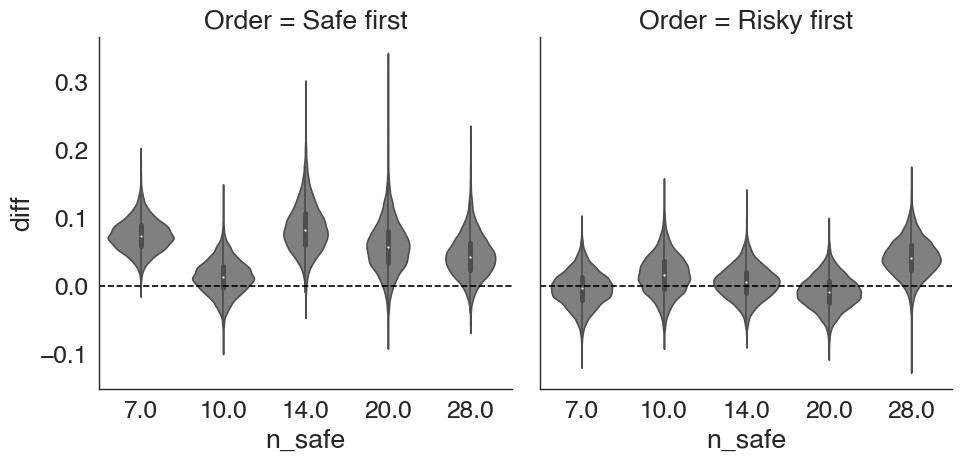

In [10]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='violin', palette=['gray'])
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

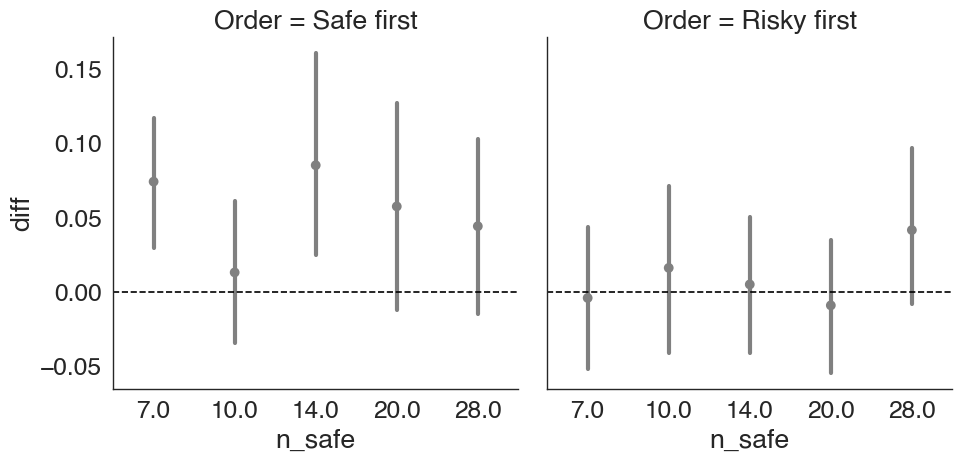

In [19]:
tmp = rnp.unstack(['stimulation_condition'])['rnp']

tmp = (tmp['ips'] - tmp['vertex']).to_frame('diff')

g = sns.catplot(x='n_safe', y='diff', col='Order', data=tmp.reset_index(), kind='point', errorbar=get_ci, palette=['gray'], errwidth=3)
g.map(lambda *args, **kwargs: plt.axhline(0.0, c='k', ls='--'))

## Subjectwise

In [7]:

intercept, gamma = extract_intercept_gamma(idata, model, data, group=False)
intercept = intercept.stack([1, 2])['intercept']
gamma = gamma.stack([1, 2])['gamma']

rnp = np.clip(np.exp(intercept/gamma),0, 1).rename('rnp')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


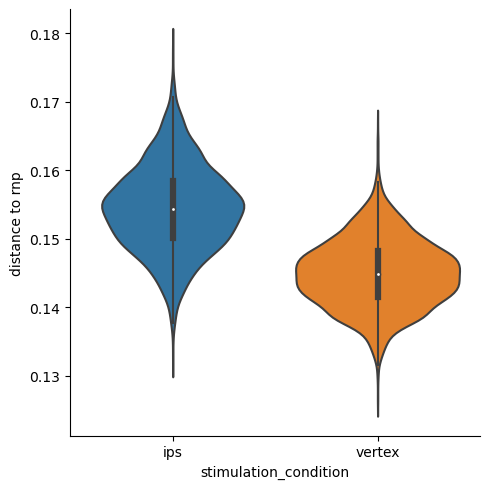

In [8]:
distance_to_rnp = rnp.groupby(['chain', 'draw', 'stimulation_condition']).apply(lambda d: (d - 0.55).abs().mean()).rename('distance to rnp')

sns.catplot(data=distance_to_rnp.reset_index(), x='stimulation_condition', y='distance to rnp', kind='violin')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_25884/4282490735.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)


0.90425

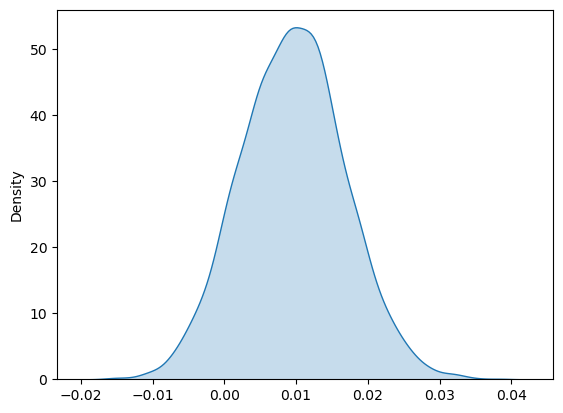

In [9]:
tmp = distance_to_rnp.unstack('stimulation_condition')
sns.kdeplot(tmp['ips'] - tmp['vertex'], shade=True)

((tmp['ips'] - tmp['vertex']) > 0).mean()